# 10 – Wildfire Data & Exploratory Analysis

In this notebook we:

1. Load a synthetic wildfire dataset (`wildfire_synthetic.csv`).
2. Perform basic exploratory data analysis (EDA).
3. Visualize distributions and relationships between key features and `fire_occurred`.

This mirrors what you would do with a real wildfire dataset from sources such as USGS and NASA FIRMS,
but keeps the data small and self-contained for teaching.

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_dir = os.path.dirname(os.path.dirname(os.getcwd())) if 'Speech_12052025' in os.getcwd() else "/mnt/data/cardiff_ai_talk_runbook"
data_path = os.path.join(base_dir, "data", "raw", "wildfire_synthetic.csv")
print(base_dir)
print(data_path)
df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head()

C:\RahulVats\EB1A\08 Speaking Opportunities\Cardiff_AmritaPrasad
C:\RahulVats\EB1A\08 Speaking Opportunities\Cardiff_AmritaPrasad\data\raw\wildfire_synthetic.csv
Shape: (1000, 13)


,region_id,latitude,longitude,year,month,temp_c,humidity,wind_speed,rain_mm_last_7d,vegetation_index,population_density,fire_occurred,burned_area_ha
0,39,41.469535,-116.137240,2018,2,24.093073,42.195398,6.227704,0.290169,0.792336,79.097815,0,0.0
1,29,34.060275,-118.254126,2021,3,22.528228,51.716240,9.026583,2.305280,0.516626,64.467692,0,0.0
2,15,35.802662,-118.334246,2016,12,18.746520,38.867670,8.471926,3.524168,0.497072,122.078773,0,0.0
3,43,36.922855,-120.089572,2023,8,25.109719,42.320369,31.701591,4.108867,0.309734,187.821740,0,0.0
4,8,37.902478,-118.988470,2022,1,14.675213,32.918174,7.476292,6.521087,0.498484,134.348968,0,0.0


In [7]:
# Basic summary statistics
df.describe()

,region_id,latitude,longitude,year,month,temp_c,humidity,wind_speed,rain_mm_last_7d,vegetation_index,population_density,fire_occurred,burned_area_ha
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.830000,38.067466,-119.038829,2019.021000,6.642000,24.874791,34.979194,19.514070,4.709105,0.547050,98.893411,0.547000,28.575548
std,14.346809,2.278784,2.913149,2.576664,3.432436,4.988751,14.586004,11.444976,4.720293,0.193926,57.503924,0.498035,48.890634
min,1.000000,34.001900,-123.998116,2015.000000,1.000000,10.477678,10.195919,0.009640,0.001215,0.200037,0.048175,0.000000,0.000000
25%,14.000000,36.071273,-121.672663,2017.000000,4.000000,21.526498,22.168848,9.644456,1.316733,0.388002,49.285223,0.000000,0.000000
50%,26.000000,38.182416,-118.997566,2019.000000,7.000000,24.692429,35.152398,19.085124,3.183242,0.547303,98.700955,1.000000,4.728277
75%,37.000000,40.019274,-116.515351,2021.000000,10.000000,28.246906,47.819711,29.550918,6.395218,0.707174,148.598352,1.000000,37.501349
max,50.000000,41.994828,-114.002862,2023.000000,12.000000,38.225184,59.973034,39.968292,29.805528,0.899032,199.901038,1.000000,328.973935


fire_occurred
1    0.547
0    0.453
Name: proportion, dtype: float64


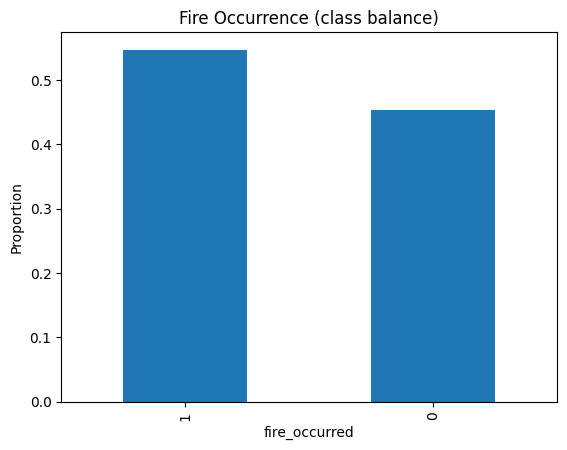

In [8]:
# Class balance for fire occurrence
fire_counts = df['fire_occurred'].value_counts(normalize=True)
print(fire_counts)

fire_counts.plot(kind='bar')
plt.title("Fire Occurrence (class balance)")
plt.xlabel("fire_occurred")
plt.ylabel("Proportion")
plt.show()

In [4]:
# Simple pairplots / correlations
numeric_cols = ['temp_c', 'humidity', 'wind_speed', 'rain_mm_last_7d', 'vegetation_index', 'population_density']
corr = df[numeric_cols + ['fire_occurred']].corr()
corr

,temp_c,humidity,wind_speed,rain_mm_last_7d,vegetation_index,population_density,fire_occurred
temp_c,1.000000,-0.013548,-0.028056,-0.040483,-0.025641,0.043702,0.153632
humidity,-0.013548,1.000000,0.000796,-0.001024,-0.012792,0.026308,-0.180443
wind_speed,-0.028056,0.000796,1.000000,-0.003682,0.009408,-0.013208,0.068518
rain_mm_last_7d,-0.040483,-0.001024,-0.003682,1.000000,0.008403,-0.023012,-0.088466
vegetation_index,-0.025641,-0.012792,0.009408,0.008403,1.000000,-0.022830,0.101091
population_density,0.043702,0.026308,-0.013208,-0.023012,-0.022830,1.000000,0.003693
fire_occurred,0.153632,-0.180443,0.068518,-0.088466,0.101091,0.003693,1.000000


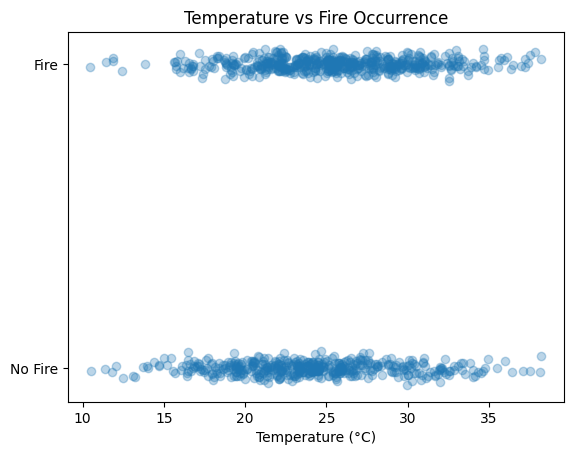

In [9]:
# Visualize relationship between temperature and fire occurrence
plt.scatter(df['temp_c'], df['fire_occurred'] + np.random.normal(0, 0.02, size=len(df)), alpha=0.3)
plt.yticks([0, 1], ["No Fire", "Fire"])
plt.xlabel("Temperature (°C)")
plt.title("Temperature vs Fire Occurrence")
plt.show()